# Práctica 9: Máquinas de Vectores Soporte

Las máquinas de vectores soporte obtienen la superficie de decisión entre dos clases, $y \in \{-1,+1\}$, que maximiza el margen mediante la minimización de la función objetivo

$\min \frac{1}{2}\mathbf{w}^T\mathbf{w}$

sujeta a las restricciones

$y_i(\mathbf{w}^t \mathbf{x} + w_0) \geq 1$

donde $\mathbf{w}$ y $w_0$ se corresponden con el vector de pesos de la superficie de decisión lineal que separa las dos clases dejando el mayor margen a cada lado de la misma. La resolución del problema anterior mediante los multiplicadores de Lagrange se puede expresar como:

$\mathbf{w} = \sum_i \lambda_i y_i \mathbf{x}_i$

donde solo unos pocos $\lambda_i$ son diferentes de cero y que dan lugar a los denominado vectores soporte.

En algunos casos la minimización de la expresión $\min \frac{1}{2}\mathbf{w}^T\mathbf{w}$ con las restricciones $y_i(\mathbf{w}^t \mathbf{x} + w_0) \geq 1$ puede dar lugar a no encontrar una solución debido a que alguna muestra puede caer dentro del margen. Por tanto, se introduce un término de regularización con el objetivo de relajar la restricción $y_i(\mathbf{w}^t \mathbf{x} + w_0) \geq 1$, resolviéndose el problema siguiente:

$\min \frac{1}{2}\mathbf{w}^T\mathbf{w} + C \sum_{i=1}^n \zeta_i$

sujeto a

$y_i(\mathbf{w}^t \mathbf{x} + w_0) \geq 1 - \zeta_i$

$\zeta_i \geq 0, i=1, \dots, n$

El parámetro $C$ controla el efecto de la regularización de forma que valores menores de este parámetro permite obtener márgenes más amplios a costa de clasificar erróneamente algunas muestras, mientras que valores mayores fuerza a que no existan muestras mal clasificadas aunque suponga márgenes más estrechos. Así, el parámetro $C$ se puede ver como una penalización por cada muestra mal clasificada (en el lado erróneo de la superficie de decisión). Es importante tenerlo en cuenta cuando en el conjunto de datos existan valores fuera de rango o mal clasificados. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC

## Efecto del parámetro de regularización $C$

Comprobar como para C pequeños => el número de vectores soporte es alto porque el margen aumenta. Para C altos => alta penalización por errores el número de vectores soporte está más próximo a la separación de las clases

In [3]:
df = pd.read_csv('datos/datos_svm.csv')
print(df.head())
X = df.values[:,:-1]
y = df.values[:,-1]

         x1        x2  y
0  1.491390 -0.638902  0
1  4.314272  2.673735  1
2 -0.443982 -0.434351  0
3  5.417299  4.807237  1
4 -1.085631  0.997345  0


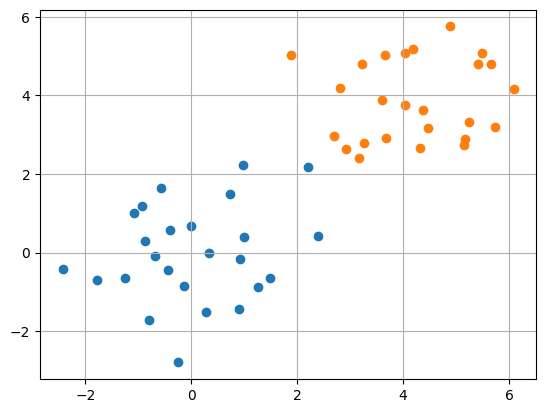

In [4]:
for clase in range(2):
    plt.scatter(X[y==clase,0], X[y==clase,1])
plt.grid()
plt.show()

Los vectores soporte se pueden acceder en el vector support_vectors_ de la clase SVC. Para comprobar el efecto del valor de C, se pueden mostrar la superficie de decisión y los vectores soporte para varios valores de C. P.e. C=1 que es el valor por defecto, C=0.01 y C=10.

In [5]:
clf = SVC(kernel='linear', C=1)
clf.fit(X,y)
vectores_soporte = clf.support_vectors_
print(f'Num. vectores soporte: {vectores_soporte.shape[0]}')
print(f'Vectores soporte: \n{clf.support_vectors_}')
print(f'Indices de los vectores soporte: {clf.support_}')

accuracy = clf.score(X,y) * 100
print(f'Accuracy: {accuracy:.2f}')

Num. vectores soporte: 5
Vectores soporte: 
[[2.20593008 2.18678609]
 [2.39236527 0.41291216]
 [0.97873601 2.23814334]
 [2.70591468 2.96121179]
 [2.91543209 2.63652846]]
Indices de los vectores soporte: [15 45 46 22 34]
Accuracy: 98.00


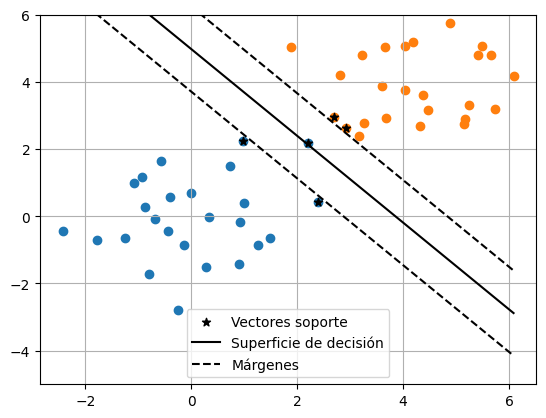

In [6]:
import numpy as np
import matplotlib.pyplot as plt

for clase in range(2):
    plt.scatter(X[y==clase, 0], X[y==clase, 1])
    
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], 
            c='k', marker='*', label='Vectores soporte')

# Línea de decisión
m = -clf.coef_[0, 0] / clf.coef_[0, 1]
n = -clf.intercept_[0] / clf.coef_[0, 1]
x_vals = np.linspace(X[:,0].min(), X[:,0].max(), 100)
decision = m * x_vals + n
plt.plot(x_vals, decision, 'k-', label='Superficie de decisión')

# Márgenes (NO ES LA FORMA CORRECTA MATEMATICAMENTE PARA CALCULARLOS PERO NOS VA A SERVIR)
margin = 1.4 / np.linalg.norm(clf.coef_) # Margen, distancia entre la línea de decisión y los vectores soporte
margin_up = decision + margin
margin_down = decision - margin
plt.plot(x_vals, margin_up, 'k--', label='Márgenes')
plt.plot(x_vals, margin_down, 'k--')

plt.ylim(-5, 6)
plt.grid()
plt.legend()
plt.show()


**Ejercicio de clase**

Utilizando el conjunto de datos datos_svm2.csv repetir lo realizado anteriormente para las tres clases, sin representar los margenes solo las rectas de decisión. Con C = 1


## Rendimiento con clases no linealmente separables

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.linear_model import LogisticRegression

In [8]:
df = pd.read_csv('datos/datos_svm3.csv')
X = df.values[:,:-1]
y = df.values[:,-1]

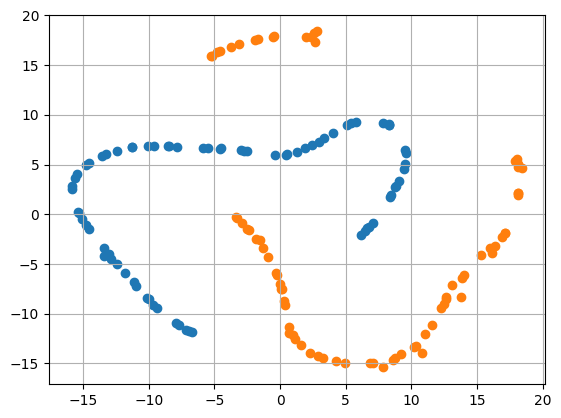

In [9]:
for clase in range(2):
    plt.scatter(X[y==clase,0], X[y==clase,1])
plt.grid()
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
exactitud = accuracy_score(y_test, y_pred)
print(f'Exactitud regresión logística: {exactitud*100:.1f}')

Exactitud regresión logística: 63.3


## Cambiando el kernel

### ¿Qué hace el kernel?

El kernel reemplaza el producto escalar 𝑥ᵢᵀ𝑥ⱼ por una función especial 𝐾(𝑥ᵢ, 𝑥ⱼ), que simula el producto escalar en un espacio de mayor dimensión. Que en "teoria", el espacio de mayor dimensión es más separable.

#### Ejemplos de kernels:

| Nombre     | Fórmula                                        | ¿Qué hace?                                     |
|------------|------------------------------------------------|------------------------------------------------|
| Lineal     | 𝑥ᵢᵀ𝑥ⱼ                                         | No transforma los datos. Separación recta.     |
| Polinomial | (𝑥ᵢᵀ𝑥ⱼ + 1)ᵈ                                 | Crea curvas polinómicas de grado *d*.          |
| RBF (Gaussiano) | exp(−γ∥𝑥ᵢ − 𝑥ⱼ∥²)                        | Crea fronteras suaves y no lineales.           |
| Sigmoide   | tanh(α𝑥ᵢᵀ𝑥ⱼ + c)                             | Inspirado en redes neuronales.                 |

### ¿Qué kernel usar?

* **Lineal**: cuando los datos son claramente separables o el número de dimensiones es grande.

* **RBF (Gaussiano)**: cuando no sabes qué forma tiene tu conjunto de datos → es el más usado por defecto.

* **Polinomial**: si crees que hay relaciones de tipo cuadrático o cúbico entre variables.


In [12]:
nucleos = ['linear', 'poly', 'rbf', 'sigmoid']

for nucleo in nucleos:
    clf = SVC(kernel=nucleo, C=10)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    exactitud = accuracy_score(y_test, y_pred)
    print(f'Exactitud núcleo {nucleo}: {exactitud*100:.1f}')

Exactitud núcleo linear: 63.3
Exactitud núcleo poly: 80.0
Exactitud núcleo rbf: 100.0
Exactitud núcleo sigmoid: 43.3


## Comparar SVC con clasificadores previos en problemas reales

### **Ejercicio: Impacto de la Normalización y del Parámetro de Regularización en SVM**

En este ejercicio, se analizará cómo afectan la normalización de las variables de entrada y el parámetro de regularización `C` al rendimiento de un clasificador SVM.

Utilizando los conjuntos de datos `precio_casas_clasificacion.csv` y `CelebA-2K.csv` con 80% train y 20% test, realiza las siguientes tareas:

1. **Entrenamiento sin normalización:**
   - Entrena un **clasificador lineal** y un **SVM con diferentes kernels** (por ejemplo: lineal, RBF, polinómico) usando las variables **sin normalizar**.
   - Observa y comenta los resultados. Ten en cuenta que algunas variables, como en el caso del dataset de precios de casas, pueden tener rangos muy distintos.

2. **Entrenamiento con normalización:**
   - Aplica **dos técnicas de normalización** a las variables de entrada:
     - **Escalado lineal (MinMaxScaler)**
     - **Estandarización (StandardScaler)**
   - Repite el entrenamiento con los mismos modelos (lineal y SVM con diferentes kernels) y compara los resultados con los obtenidos en el paso anterior.

3. **Análisis del parámetro `C`:**
   - Para cada configuración anterior (con y sin normalización), prueba diferentes valores del **parámetro de regularización `C`** (por ejemplo: `0.01`, `0.1`, `1`, `10`, `100`).
   - Analiza cómo afecta este parámetro a la **exactitud del modelo** en el conjunto de prueba.

4. **Compara con otros clasificadores el rendimento:**
   - KNN
   - Regresión logística
   - Perceptrón

4. **Conclusión:**
   - Resume tus observaciones sobre cómo influyen la normalización y el parámetro `C` en el rendimiento de los modelos SVM.
   - Comenta si hay diferencias significativas entre los dos datasets en cuanto a sensibilidad a la normalización.

In [13]:
# Esta es la normalizacion StandardScaler
from sklearn.preprocessing import StandardScaler # Normaliza los datos a media 0 y varianza 1 usando X = (X - media) / desviacion

# Ejemplo de normalizacion
df = pd.read_csv('datos/datos_svm3.csv')
X = df.values[:,:-1]
y = df.values[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler() # Se usa igual que el MinMaxScaler
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
clf = SVC(kernel='linear', C=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
exactitud = accuracy_score(y_test, y_pred)
print(f'Exactitud núcleo lineal normalizado: {exactitud*100:.1f}')

Exactitud núcleo lineal normalizado: 76.7
